In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\rohan\Data_Challenge_21\UMD-Data-Challenge-21-Team-30\Data\Data_Lv2_NCSG_BehaviorChangesCOVID19.csv',
                encoding='cp1252')

In [5]:
df2 = pd.read_csv(r'C:\Users\rohan\Data_Challenge_21\UMD-Data-Challenge-21-Team-30\Data\dataset_urban_rural.csv',
                encoding='cp1252')

In [35]:
df2.tail()

,Unnamed: 0,Date,Time,HHState,updated_zipcode,Sex,Age,HHsize,Kids,Auto_own,...,Groc_Shp,Outside_Ac,Outside_Purp,ONL_SHP,ONL_SHP_AFTR,ruca1,zip,city,population,density
495,495,5/27/2020,12:34:12 PM,FL,33182,1,34.0,2.0,0.0,2.0,...,3,1,NaN,2,2,1,33182,Miami,16607,416.3
496,496,5/26/2020,9:21:31 AM,IL,60640,2,32.0,3.0,1.0,1.0,...,3,1,NaN,1,1,1,60640,Chicago,69363,11102.5
497,497,4/18/2020,1:18:30 AM,TN,37042,1,32.0,2.0,0.0,2.0,...,3,1,NaN,1,3,1,37042,Clarksville,77945,493.6
498,498,5/15/2020,10:47:41 PM,MD,20685,2,18.0,4.0,1.0,2.0,...,3,2,Spend time with friends,1,3,2,20685,Saint Leonard,6942,120.4
499,499,5/26/2020,11:55:59 AM,WA,98502,2,53.0,1.0,0.0,1.0,...,3,3,meet one friend for social distance walk at ne...,2,-8,1,98502,Olympia,35018,248.7


In [26]:
df.describe()

,PersonID,Sex,HHsize,Kids,Auto_own,Married,Educ,HType,Worker,commute_before,...,Transmode_after,Commute_min,PhyAc_Before,Exe_Before,PhyAc_After,Exe_After,Groc_Shp,Outside_Ac,ONL_SHP,ONL_SHP_AFTR
count,564.00000,564.000000,563.000000,563.000000,563.000000,564.000000,564.000000,564.000000,564.000000,564.000000,...,564.000000,552.000000,563.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,282.50000,1.531915,2.813499,0.698046,1.815275,1.608156,3.810284,2.035461,1.265957,0.712766,...,-7.062057,29.570652,2.761989,2.615248,2.732270,3.593972,3.609929,2.487589,1.388298,-2.031915
std,162.95705,1.243402,1.321474,0.986265,1.018327,1.445519,0.414438,1.295772,0.692649,2.805560,...,3.316043,22.887528,0.943329,1.000452,1.097852,2.122375,1.315426,1.343964,1.294861,5.030180
min,1.00000,-9.000000,0.000000,0.000000,0.000000,-8.000000,2.000000,1.000000,1.000000,-8.000000,...,-8.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8.000000,-8.000000
25%,141.75000,1.000000,2.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,-8.000000,15.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,-8.000000
50%,282.50000,2.000000,3.000000,0.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,...,-8.000000,25.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,1.000000
75%,423.25000,2.000000,4.000000,1.000000,2.000000,2.000000,4.000000,3.000000,1.000000,2.000000,...,-8.000000,40.000000,3.000000,3.000000,4.000000,5.000000,5.000000,4.000000,2.000000,2.000000
max,564.00000,2.000000,12.000000,4.000000,7.000000,3.000000,4.000000,5.000000,4.000000,3.000000,...,7.000000,180.000000,4.000000,4.000000,4.000000,7.000000,5.000000,4.000000,2.000000,3.000000


In [90]:
df.columns = ['PersonID', 'Date', 'Time', 'HHState', 'Zipcode', 'Sex', 'Age',
       'HHsize', 'Kids', 'Auto_own', 'Married', 'Educ', 'HType', 'Worker',
       'commute_before', 'commute_after', 'Transmode_before', 'changemode',
       'Transmode_after', 'Commute_min', 'PhyAc_Before', 'Exe_Before',
       'PhyAc_After', 'Exe_After', 'Groc_Shp', 'Outside_Ac', 'Outside_Purp',
       'ONL_SHP', 'ONL_SHP_AFTR']

In [29]:
var = df[["Educ", "commute_after"]]
var.corr()

,Educ,commute_after
Educ,1.000000,0.010569
commute_after,0.010569,1.000000


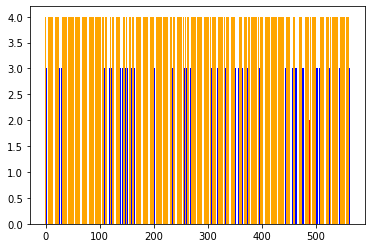

In [31]:
colors = []
i = 0
for x in df.Educ:
   if(x == 1):
    colors.append('Green')
   if(x == 2):
    colors.append('Red')
   if(x == 3):
    colors.append('Blue')
   if(x == 4):
    colors.append('Orange')
   if(x == -8):
    colors.append('Black')

height = df.Educ
bars = df.commute_after
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=colors)
plt.show()
#education level skewed because many respondents have graduate degrees

In [58]:
var2 = df.loc[df.Educ==4 ]
len(var2)

462

In [78]:
var3 = df.loc[(df.Educ==2) & (df.commute_before==1) & (df.commute_after==4)]
len(var3)

1

In [72]:
var4 = df.loc[(df.Educ==3) & (df.commute_before==1) & (df.commute_after==4)]
len(var4)

37

In [73]:
var5 = df.loc[(df.Educ==4) & (df.commute_before==1) & (df.commute_after==4)]
len(var5)

169

In [92]:
len(df.loc[df.commute_after==4])

295

In [99]:
len(df.loc[(df.commute_after==4) & (df.commute_before==1)])
#people who drove to work and now telework

207

In [101]:
len(df.loc[(df.Transmode_before==3) & (df.Transmode_after==1)])
#people who transitioned from public transport to driving cars

5

In [104]:
len(df.loc[(df.Exe_Before==4) & (df.Exe_After==3)])
#most people prioritized the pandemic over the gym

21

In [106]:
len(df.loc[df.Transmode_before==3])

101

In [ ]:
YVar = df[["Educ"]] # we set up the dependent variable as the score of the applicant
XVar = df[["co", "gpa"]] # we now use two dependent variables including credits and gpa
LinearModel = sm.OLS(YVar, XVar).fit() # this creates the linear model
print(LinearModel.summary())

In [46]:
df.HHState.describe()

count     564
unique     42
top        MD
freq      144
Name: HHState, dtype: object

In [55]:
states = df.HHState.unique()
print (states)
frequency = []
for state in states:
    frequency.append(len(df.loc[df.HHState==state]))
print (frequency)

['CO' 'MI' 'CA' 'MD' 'PA' 'NV' 'NC' 'MS' 'NJ' 'OR' 'TX' 'WA' 'VA' 'MA'
 'KS' 'SC' 'DC' 'DE' 'ME' 'NY' 'IL' 'MN' 'FL ' 'FL' 'TN' 'NH' 'WI' 'IA'
 'MO' 'OH' 'ID' 'AZ' 'AL' 'GA' 'CT' 'AR' 'IN' 'OK' 'NM' 'UT' 'Tx' 'NY ']
[12, 11, 51, 144, 24, 3, 3, 3, 19, 11, 14, 53, 30, 20, 2, 3, 23, 12, 13, 21, 10, 3, 18, 3, 4, 2, 4, 3, 1, 7, 1, 7, 3, 8, 5, 2, 5, 1, 1, 2, 1, 1]


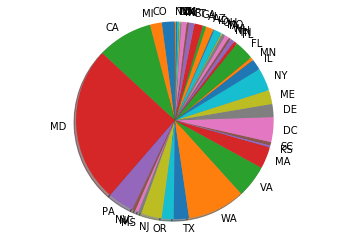

In [105]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = states
sizes = frequency
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, #autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Index(['PersonID', 'Date', 'Time', 'HHState', 'Zipcode', 'Sex', 'Age',
       'HHsize', 'Kids', 'Auto_own', 'Married', 'Educ', 'HType', 'Worker ',
       'commute_before', 'commute_after', 'Transmode_before', 'changemode',
       'Transmode_after', 'Commute_min', 'PhyAc_Before', 'Exe_Before',
       'PhyAc_After', 'Exe_After', 'Groc_Shp', 'Outside_Ac', 'Outside_Purp',
       'ONL_SHP', 'ONL_SHP_AFTR'],
      dtype='object')

In [120]:
ar = df.loc[(df.Exe_After==3) & (df.Transmode_after==-8)]
ar2 = df.loc[(df.Exe_After==2) & (df.Transmode_after==-8)]
ar3 = df.loc[(df.Exe_After==7) & (df.Transmode_after==-8)]
len(ar)+len(ar2)+len(ar3)

258

In [130]:
change = df.loc[(df.Exe_Before!=1) & (df.Exe_After==1)]
len(change)

77

In [131]:
change = df.loc[(df.Exe_Before!=1) & (df.Exe_After==1) & (df.Transmode_after==-8) ]
len(change)

71

In [138]:
df.loc[(df.Transmode_before!=-8)].Commute_min.describe()

count    522.000000
mean      31.097701
std       22.508604
min        0.000000
25%       15.000000
50%       30.000000
75%       40.000000
max      180.000000
Name: Commute_min, dtype: float64

In [151]:
len(df.loc[df.Transmode_before==3])

101

In [150]:
len(df.loc[df.Transmode_after==3])

0

In [149]:
var = [1.735,1.694,1.655,1.68,1.75,1.776,1.87,1.883,1.947,2.017,2.048,2.094,2.1]
#fuel prices from April 2020 - July 2020

In [154]:
print (df2.columns)

Index(['Unnamed: 0', 'Date', 'Time', 'HHState', 'updated_zipcode', 'Sex',
       'Age', 'HHsize', 'Kids', 'Auto_own', 'Married', 'Educ', 'HType',
       'Worker', 'commute_before', 'commute_after', 'Transmode_before',
       'changemode', 'Transmode_after', 'Commute_min', 'PhyAc_Before',
       'Exe_Before', 'PhyAc_After', 'Exe_After', 'Groc_Shp', 'Outside_Ac',
       'Outside_Purp', 'ONL_SHP', 'ONL_SHP_AFTR', 'ruca1', 'zip', 'city',
       'population', 'density'],
      dtype='object')


In [155]:
print (df2.loc[df2.commute_before==1].city)

0             Golden
2          San Diego
6          Bethlehem
7         Myersville
8         Myersville
           ...      
493         Syracuse
494        Patchogue
495            Miami
498    Saint Leonard
499          Olympia
Name: city, Length: 314, dtype: object


In [28]:
cities = df2.city.unique()
#print (cities)
print(len(cities))
frequency = []
for city in cities:
    frequency.append(len(df2.loc[df2.city==city]))
num_drivers = []
for city in cities:
    num_drivers.append([city, len(df2.loc[(df2.Transmode_before==1)&(df2.city==city)]),len(df2.loc[(df2.Transmode_after==1)&(df2.city==city)]),(sum(df2.loc[df2.Commute_min])/len(df2.loc[df2.Commute_min]))])
print(num_drivers)

229
[['Golden', 2, 0], ['Whitmore Lake', 1, 0], ['San Diego', 3, 1], ['Baltimore', 9, 0], ['Hyattsville', 3, 0], ['Bethlehem', 1, 0], ['Myersville', 2, 0], ['Reno', 1, 0], ['Cary', 0, 0], ['Starkville', 2, 0], ['Bethesda', 10, 2], ['Portland', 2, 1], ['Santa Monica', 2, 1], ['Austin', 2, 0], ['Seattle', 19, 0], ['Vienna', 2, 0], ['Lawrence', 1, 0], ['Columbia', 9, 1], ['Arlington', 6, 0], ['Dallas', 2, 0], ['Washington', 3, 0], ['Dublin', 0, 1], ['New Freedom', 1, 0], ['Los Alamitos', 1, 0], ['Kirkland', 4, 0], ['McLean', 3, 1], ['Durango', 1, 0], ['Gaithersburg', 7, 0], ['College Station', 1, 0], ['Laurel', 2, 0], ['Wilmington', 1, 0], ['Brighton', 0, 0], ['Philadelphia', 2, 0], ['Silver Spring', 9, 0], ['Marriottsville', 0, 0], ['Las Vegas', 1, 0], ['Los Altos', 2, 0], ['New York', 0, 0], ['Champaign', 1, 0], ['Suffern', 1, 0], ['Happy Valley', 1, 0], ['Coppell', 1, 0], ['Mankato', 1, 0], ['Odenton', 1, 0], ['Miami', 4, 1], ['Bowie', 4, 0], ['Tallahassee', 2, 0], ['Lancaster', 1, 0],

In [39]:
print(len(df2.loc[df2.Transmode_before==1]))
print(len(df2.loc[df2.Transmode_before==2]))
print(len(df2.loc[df2.Transmode_before==3]))
print(len(df2.loc[df2.Transmode_before==4]))
print(len(df2.loc[df2.Transmode_before==5]))
print(len(df2.loc[df2.Transmode_before==6]))
print(len(df2.loc[df2.Transmode_before==7]))
print(len(df2.loc[df2.Transmode_before==-8]))

308
12
93
31
21
5
5
25


In [34]:
len(df2.loc[df2.Transmode_after==1])

17

In [44]:
print(df2.loc[df2.Worker==3])

     Unnamed: 0       Date         Time HHState  updated_zipcode  Sex   Age  \
10           10  5/20/2020   1:37:28 PM      NC            27513    2  58.0   
22           22  4/11/2020  10:02:39 AM      MD            20817    2  35.0   
23           23  5/12/2020   9:18:59 AM      MD            20817   -9  27.0   
33           33  4/10/2020   6:47:39 PM      WA            98105    2  29.0   
34           34  4/11/2020   2:09:44 AM      WA            98105    2  29.0   
36           36  4/23/2020   2:35:34 AM      VA            22182    2  37.0   
61           61  5/28/2020  12:55:30 AM      MD            20878    2  30.0   
67           67  5/12/2020  11:25:24 PM      MI            48114    2  75.0   
78           78  5/12/2020  12:42:34 PM      DC            20010    2  30.0   
80           80  5/19/2020   2:03:12 PM      CA            94024    2  79.0   
86           86  4/10/2020   9:02:06 PM      MD            20879    2  31.0   
109         109  5/12/2020   6:28:16 PM      PA     

In [48]:
len(df.loc[df.Transmode_after==1])

18